In [1]:

from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

## DIS Volatility


In [5]:
import requests
import pandas as pd

# Your Alpha Vantage API key
api_key = '071XAV96TNY921'

# Define the ticker symbol
tickerSymbol = 'DIS'  # Microsoft

# Define the API endpoint and parameters
base_url = 'https://www.alphavantage.co/query'
params = {
    'function': 'TIME_SERIES_DAILY',  # Retrieve daily time series
    'symbol': tickerSymbol,
    'apikey': api_key,
    'outputsize': 'full'  # Get the full-length time series
}

# Get the data from Alpha Vantage
response = requests.get(base_url, params=params)
data = response.json()

# Convert the JSON data into a Pandas DataFrame
tickerDf = pd.DataFrame(data['Time Series (Daily)']).T

# Convert index to datetime
tickerDf.index = pd.to_datetime(tickerDf.index)

# Filter data between specific dates
tickerDf = tickerDf[(tickerDf.index >= '2015-1-1') & (tickerDf.index <= '2020-6-10')]

# Print the DataFrame
print(tickerDf)

             1. open   2. high    3. low  4. close 5. volume
2020-06-10  124.0200  124.1000  120.9300  122.1800  11421848
2020-06-09  125.6300  125.7900  123.5100  123.8900  10875870
2020-06-08  125.1000  127.4400  123.9400  127.2800  13844911
2020-06-05  126.3100  127.8200  124.2800  124.8200  16572615
2020-06-04  121.9500  124.5000  121.8500  123.6900  14188361
...              ...       ...       ...       ...       ...
2015-01-08   93.8700   94.3000   93.5550   93.7900   7571727
2015-01-07   92.7200   93.1500   92.1000   92.8300   6589438
2015-01-06   92.5700   93.1910   91.1570   91.8900   6802241
2015-01-05   93.2800   93.3500   91.7800   92.3800   7789422
2015-01-02   94.9100   95.2800   92.8486   93.7500   5865382

[1369 rows x 5 columns]


In [11]:
print(tickerDf.columns)


Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')


In [12]:
print(tickerDf['4. close'].head())


2020-06-10    122.1800
2020-06-09    123.8900
2020-06-08    127.2800
2020-06-05    124.8200
2020-06-04    123.6900
Name: 4. close, dtype: object


In [13]:
tickerDf['4. close'] = pd.to_numeric(tickerDf['4. close'], errors='coerce')
returns = 100 * tickerDf['4. close'].pct_change().dropna()


Text(0.5, 1.0, 'DIS Returns')

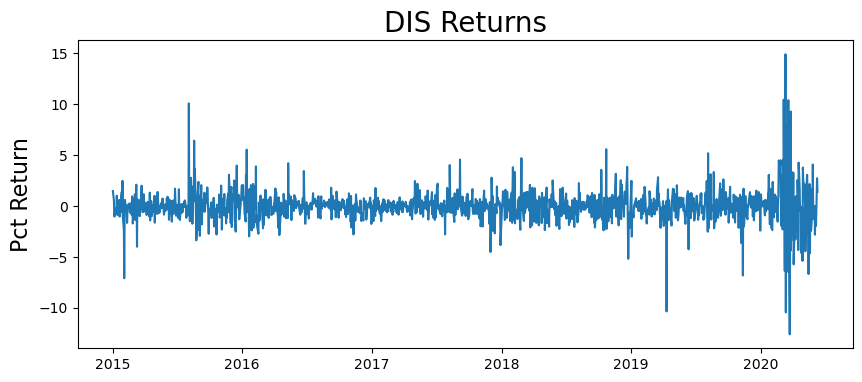

In [14]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

# PACF

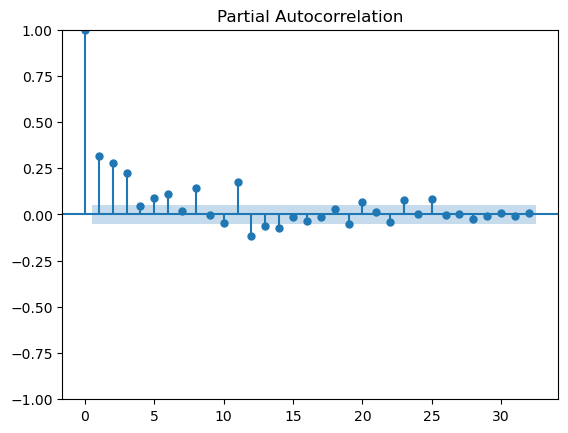

In [15]:
plot_pacf(returns**2)
plt.show()

# Fit GARCH(3,3)

In [16]:
model = arch_model(returns, p=3, q=3)

In [17]:
model_fit = model.fit()


Iteration:      1,   Func. Count:     10,   Neg. LLF: 5317.6188989650655
Iteration:      2,   Func. Count:     25,   Neg. LLF: 3683.9550566767457
Iteration:      3,   Func. Count:     35,   Neg. LLF: 3632.224164460698
Iteration:      4,   Func. Count:     45,   Neg. LLF: 3030.3480439958666
Iteration:      5,   Func. Count:     56,   Neg. LLF: 2459.8849945969987
Iteration:      6,   Func. Count:     66,   Neg. LLF: 2358.748136624573
Iteration:      7,   Func. Count:     76,   Neg. LLF: 2555.6362862950064
Iteration:      8,   Func. Count:     86,   Neg. LLF: 2505.588834461099
Iteration:      9,   Func. Count:     97,   Neg. LLF: 2310.031323477703
Iteration:     10,   Func. Count:    107,   Neg. LLF: 2278.697115209292
Iteration:     11,   Func. Count:    116,   Neg. LLF: 2278.788397786794
Iteration:     12,   Func. Count:    126,   Neg. LLF: 2278.7908288688454
Iteration:     13,   Func. Count:    136,   Neg. LLF: 2278.3386740503865
Iteration:     14,   Func. Count:    145,   Neg. LLF: 227

In [18]:

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:               4. close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2278.31
Distribution:                  Normal   AIC:                           4572.62
Method:            Maximum Likelihood   BIC:                           4614.39
                                        No. Observations:                 1368
Date:                Mon, Aug 19 2024   Df Residuals:                     1367
Time:                        13:12:17   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            -0.0124  3.340e-02     -0.370      0.711 [-7.783e-02,5.309e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.3312      0.189      1.751  7.989e-02 [-3.946e-02,  0.702]
alpha[1]       0.3625      0.170      2.130  3.318e-02  [2.891e-02,  0.696]
alpha[2]       0.1375      0.164      0.836      0.403    [ -0.185,  0.460]
alpha[3]       0.1170      0.187      0.627      0.531    [ -0.249,  0.483]
beta[1]    8.0759e-17      0.336  2.407e-16      1.000    [ -0.658,  0.658]
beta[2]        0.0672      0.321      0.209      0.834    [ -0.562,  0.696]
beta[3]        0.2584      0.157      1.641      0.101 [-5.019e-02,  0.567]
===========================================================================

Covariance estimator: robust
"""

# Try GARCH(3,0) = ARCH(3)


In [19]:

model = arch_model(returns, p=3, q=0)

In [20]:

model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 5898.556415929768
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2720.4563113284676
Iteration:      3,   Func. Count:     24,   Neg. LLF: 362168.8914026672
Iteration:      4,   Func. Count:     31,   Neg. LLF: 9800394.617406718
Iteration:      5,   Func. Count:     38,   Neg. LLF: 7287.7850070967825
Iteration:      6,   Func. Count:     45,   Neg. LLF: 6955.3305062876825
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2307.8938459253523
Iteration:      8,   Func. Count:     59,   Neg. LLF: 2294.7184054971426
Iteration:      9,   Func. Count:     65,   Neg. LLF: 2293.2607870064476
Iteration:     10,   Func. Count:     71,   Neg. LLF: 2293.0260375447137
Iteration:     11,   Func. Count:     77,   Neg. LLF: 2292.9393670616328
Iteration:     12,   Func. Count:     83,   Neg. LLF: 2292.927417555906
Iteration:     13,   Func. Count:     89,   Neg. LLF: 2292.925885016958
Iteration:     14,   Func. Count:     95,   Neg. LLF: 22

In [21]:

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:               4. close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2292.93
Distribution:                  Normal   AIC:                           4595.85
Method:            Maximum Likelihood   BIC:                           4621.96
                                        No. Observations:                 1368
Date:                Mon, Aug 19 2024   Df Residuals:                     1367
Time:                        13:12:59   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            -0.0163  3.286e-02     -0.496      0.620 [-8.071e-02,4.808e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.7333  8.975e-02      8.170  3.079e-16   [  0.557,  0.909]
alpha[1]       0.3862      0.138      2.797  5.151e-03   [  0.116,  0.657]
alpha[2]       0.1998  7.685e-02      2.600  9.327e-03 [4.917e-02,  0.350]
alpha[3]       0.2054  8.152e-02      2.520  1.175e-02 [4.561e-02,  0.365]
==========================================================================

Covariance estimator: robust
"""

In [22]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [23]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

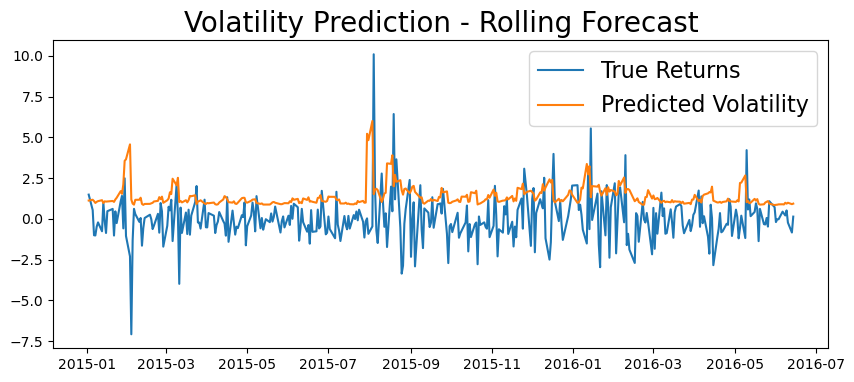

In [24]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# S&P 500


In [25]:
# Your Alpha Vantage API key
api_key = '071XAV96TNY921'

# Define the ticker symbol
tickerSymbol = 'SPY'  # Microsoft

# Define the API endpoint and parameters
base_url = 'https://www.alphavantage.co/query'
params = {
    'function': 'TIME_SERIES_DAILY',  # Retrieve daily time series
    'symbol': tickerSymbol,
    'apikey': api_key,
    'outputsize': 'full'  # Get the full-length time series
}

# Get the data from Alpha Vantage
response = requests.get(base_url, params=params)
data = response.json()

# Convert the JSON data into a Pandas DataFrame
tickerDf = pd.DataFrame(data['Time Series (Daily)']).T

# Convert index to datetime
tickerDf.index = pd.to_datetime(tickerDf.index)

# Filter data between specific dates
tickerDf = tickerDf[(tickerDf.index >= '2000-1-1') & (tickerDf.index <= '2020-6-10')]

# Print the DataFrame
print(tickerDf)

             1. open   2. high    3. low  4. close  5. volume
2020-06-10  321.4200  322.3900  318.2200  319.0000   93944722
2020-06-09  320.3000  323.2800  319.3600  320.7900   77174695
2020-06-08  320.2200  323.4100  319.6300  323.2000   73310274
2020-06-05  317.2300  321.2700  317.1600  319.3400  150302461
2020-06-04  311.1100  313.0000  309.0800  311.3600   75471787
...              ...       ...       ...       ...        ...
2000-01-07  140.3125  145.7500  140.0625  145.7500    8066500
2000-01-06  139.6250  141.5000  137.7500  137.7500    6227200
2000-01-05  139.9375  141.5312  137.2500  140.0000   12177900
2000-01-04  143.5312  144.0625  139.6406  139.7500    8089800
2000-01-03  148.2500  148.2500  143.8750  145.4375    8164300

[5142 rows x 5 columns]


In [26]:
tickerDf['4. close'] = pd.to_numeric(tickerDf['4. close'], errors='coerce')
returns = 100 * tickerDf['4. close'].pct_change().dropna()

Text(0.5, 1.0, 'SPY Returns')

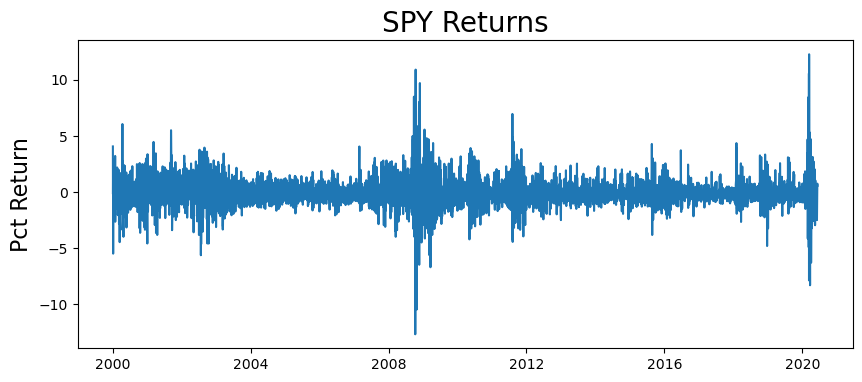

In [28]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

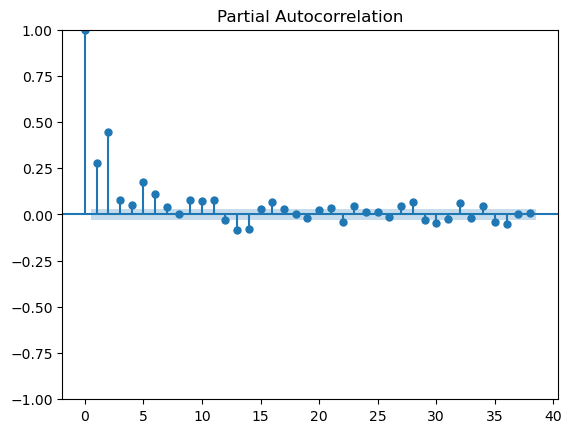

In [29]:
plot_pacf(returns**2)
plt.show()

In [30]:
model = arch_model(returns, p=2, q=2)

In [31]:

model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 109168.09665810633
Iteration:      2,   Func. Count:     21,   Neg. LLF: 3659071.724251821
Iteration:      3,   Func. Count:     30,   Neg. LLF: 8462.911977499436
Iteration:      4,   Func. Count:     39,   Neg. LLF: 7617.516804686069
Iteration:      5,   Func. Count:     47,   Neg. LLF: 7050.9357365447295
Iteration:      6,   Func. Count:     55,   Neg. LLF: 7123.50636384483
Iteration:      7,   Func. Count:     63,   Neg. LLF: 7047.740005596636
Iteration:      8,   Func. Count:     71,   Neg. LLF: 7042.789151479621
Iteration:      9,   Func. Count:     79,   Neg. LLF: 7046.300970897644
Iteration:     10,   Func. Count:     87,   Neg. LLF: 7039.662217674469
Iteration:     11,   Func. Count:     95,   Neg. LLF: 7038.73257907982
Iteration:     12,   Func. Count:    102,   Neg. LLF: 7038.746722572525
Iteration:     13,   Func. Count:    110,   Neg. LLF: 7038.705108917751
Iteration:     14,   Func. Count:    117,   Neg. LLF: 7038.70401

In [32]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:               4. close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7038.70
Distribution:                  Normal   AIC:                           14089.4
Method:            Maximum Likelihood   BIC:                           14128.7
                                        No. Observations:                 5141
Date:                Mon, Aug 19 2024   Df Residuals:                     5140
Time:                        13:30:33   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
mu            -0.0623  1.067e-02     -5.834  5.400e-09 [-8.318e-02,-4.135e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0257  6.565e-03      3.920  8.848e-05 [1.287e-02,3.861e-02]
alpha[1]       0.0384  1.530e-02      2.512  1.201e-02 [8.442e-03,6.840e-02]
alpha[2]       0.1389  3.288e-02      4.224  2.400e-05   [7.445e-02,  0.203]
beta[1]        0.8115      0.235      3.455  5.512e-04     [  0.351,  1.272]
beta[2]        0.0000      0.201      0.000      1.000     [ -0.394,  0.394]
============================================================================

Covariance estimator: robust
"""

In [33]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [34]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

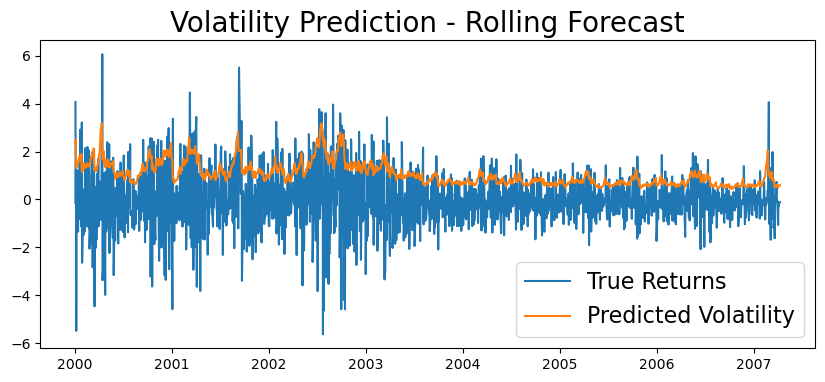

In [35]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# How to use the model

In [36]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [37]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

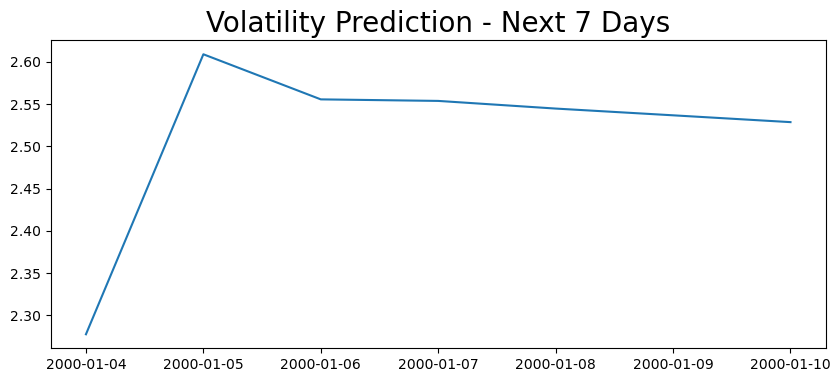

In [38]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)